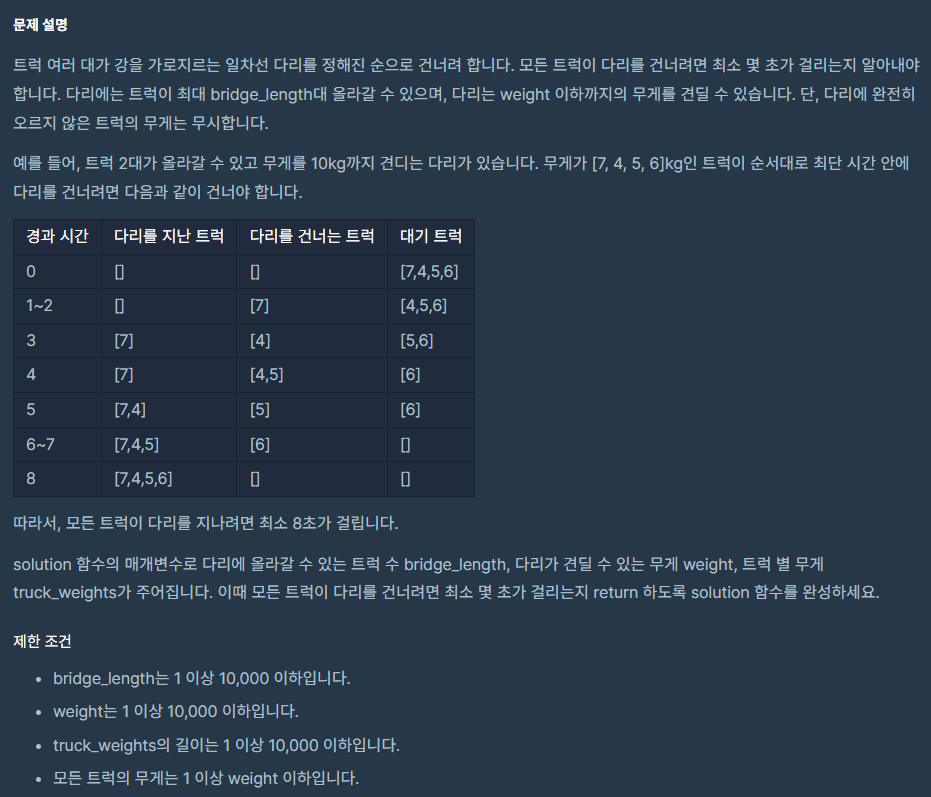

## 아이디어
* deque를 사용하여 다리의 왼쪽에서 트럭이 추가되고 오른쪽에서 트럭이 나가게 만듦. 이때 초기의 다리 리스트는 다리의 길이 * [0]임.


* 매초마다 다리의 오른쪽에서는 리스트의 마지막 행이 제거된다.
* 매초마다 다리의 왼쪽에서는 트럭이 추가되거나, [0]이 추가된다.
* 마지막 트럭이 다리에 오를 때까지 위 두과정을 반복한다.
* 정답 : 마지막 트럭이 다리에 오를 때의 시간 + 다리의 길이

In [9]:
from collections import deque
def solution(bridge_length, weight, truck_weights):
    bridge = deque([0]*bridge_length)
    time = 0
    sum_v=0
    while truck_weights:
        sum_v-=bridge.pop()
        if truck_weights[0]+sum_v<=weight:
            sum_v+=truck_weights[0]
            bridge.appendleft(truck_weights.pop(0))
        else:
            bridge.appendleft(0)
        time+=1
    return time+bridge_length

In [8]:
bridge_length =100
weight = 100
truck_weights =[10,10,10,10,10,10,10,10,10,10]
solution(bridge_length, weight, truck_weights)

110

In [7]:
bridge_length =2
weight = 10
truck_weights =[7,4,5,6]
solution(bridge_length, weight, truck_weights)

8

고수풀이

In [ ]:

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
import collections

DUMMY_TRUCK = 0


class Bridge(object):

    def __init__(self, length, weight):
        self._max_length = length
        self._max_weight = weight
        self._queue = collections.deque()
        self._current_weight = 0

    def push(self, truck):
        next_weight = self._current_weight + truck
        if next_weight <= self._max_weight and len(self._queue) < self._max_length:
            self._queue.append(truck)
            self._current_weight = next_weight
            return True
        else:
            return False

    def pop(self):
        item = self._queue.popleft()
        self._current_weight -= item
        return item

    def __len__(self):
        return len(self._queue)

    def __repr__(self):
        return 'Bridge({}/{} : [{}])'.format(self._current_weight, self._max_weight, list(self._queue))


def solution(bridge_length, weight, truck_weights):
    bridge = Bridge(bridge_length, weight)
    trucks = collections.deque(w for w in truck_weights)

    for _ in range(bridge_length):
        bridge.push(DUMMY_TRUCK)

    count = 0
    while trucks:
        bridge.pop()

        if bridge.push(trucks[0]):
            trucks.popleft()
        else:
            bridge.push(DUMMY_TRUCK)

        count += 1

    while bridge:
        bridge.pop()
        count += 1

    return count


def main():
    print(solution(2, 10, [7, 4, 5, 6]), 8)
    print(solution(100, 100, [10]), 101)
    print(solution(100, 100, [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]), 110)


if __name__ == '__main__':
    main()